# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "\nMean:"
print data.mean()
print "\nStandard deviation:"
print data.std()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Mean:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Standard deviation:
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
For the first PCA component, I think we will see "fresh" and "milk" have the same sign, and relatively magnitude large. Customers interested in one perishable item is likely interested in others.

I believe that all the other dimensions would also have the sign, as more spending in one category would likely be associated with higher spending in others.

Finally, I think that it is clear that the magnitude of "fresh" will be clearly be much larger than the others.

I'm hesitant to make any other claims without exploring the data much more, however.

### PCA

In [14]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
n_features = data.shape[1]
n_samples = data.shape[0]
n_components = n_features

from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA components:"
print pca.components_
print "\nexplained variance:"
print pca.explained_variance_ratio_
print "\ncumulative explained variance:"
print np.cumsum(pca.explained_variance_ratio_)

PCA components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]

explained variance:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]

cumulative explained variance:
[ 0.45961362  0.86478588  0.93481597  0.97883941  0.99386152  1.        ]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

[ 0.45961362  0.86478588  0.93481597  0.97883941  0.99386152  1.        ]


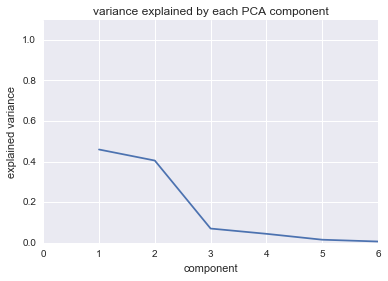

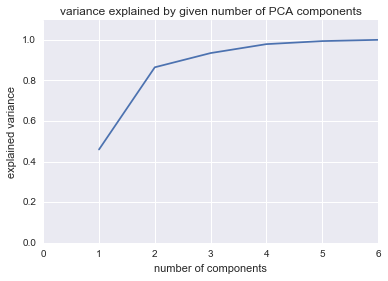

In [12]:
plt.figure()
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_)
plt.axis([0, n_components, 0, 1.1])
plt.xlabel("component")
plt.ylabel("explained variance")
plt.grid(True)
plt.title("variance explained by each PCA component")

plt.figure()
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, n_components, 0, 1.1])
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.grid(True)
plt.title("variance explained by given number of PCA components")

Answer:

The explained variance falls off rather quickly after the first two components which, between them, capture 86.5% of the variance in the data.

IF I were to use PCA on this dataset, how many components I would use would vary depending on what I was trying to do. There are so few dimensions that I don't believe that I would throw any of them away, and use the full set. Unless I start running into computational issues, I don't see any reason to reduce the dimension.

That said, if I *did* start running into computational issues, and I need my algorithms to run more efficiently, then I would absolutely keep the first two dimensions. I would compare the results from using two dimensions to those from using three and four dimensions, though, to see what the right balance is. Honestly, I doubt that fourth dimension will make a difference, but I don't see a reason not to check.

Unless we want to create tens or hundreds of market segments (which we do not even have the data to do right now), the last 2.1% of variance that the last two dimensions capture should not matter.

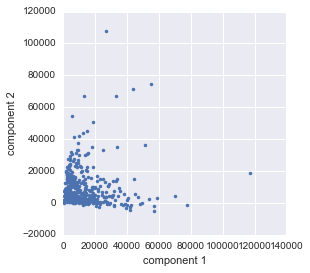

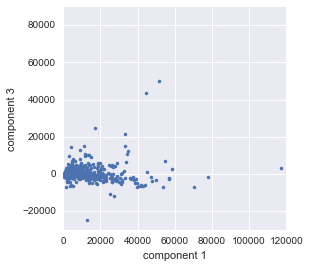

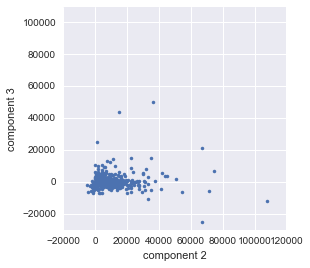

In [56]:
X_reduced = np.dot(pca.components_, np.transpose(data.as_matrix()))

plt.figure()
plt.plot(-X_reduced[0], X_reduced[1], '.')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt_axis1 = plt.axis('square')

plt.figure()
plt.plot(-X_reduced[0], X_reduced[2], '.')
plt.xlabel("component 1")
plt.ylabel("component 3")
plt_axis2 = plt.axis('square')

plt.figure()
plt.plot(X_reduced[1], X_reduced[2], '.')
plt.xlabel("component 2")
plt.ylabel("component 3")
plt_axis3 = plt.axis('square')

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:

The dimensions represent the directions in which the data varies. The first two components explain similar amounts of variance. The first points mostly in the "fresh" direction, and the second points more-or-less in the "milk-grocery-detergents_paper" direction.

Just by looking at the directions of the PCA components, we cannot quite claim that "a customer that buys more 'milk' also buys more 'fresh'". We can say that the data of most customers will lie near the plane defined by the first two vectors, however. At the very least, projecting onto the PCA components allows us to visualize our data more effectively without losing significant meaning.

As mentioned above, we could also project our data onto the first few PCA components in order to reduct the dimensionality of our data.

### ICA

In [58]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=n_components)
ica.fit(data)

# Print the independent components
print ica.components_

[[ -1.62803623e-07  -9.79332980e-06   5.97150562e-06   3.35595395e-07
   -3.78224409e-06   5.98076683e-06]
 [  8.63189392e-07   1.46477818e-07  -7.74983850e-07  -1.11475363e-05
    5.36014980e-07   5.94975770e-06]
 [  3.97923321e-06  -8.96416606e-07  -7.92428976e-07  -6.62616562e-07
    2.44073738e-06  -9.44965866e-07]
 [ -1.95350371e-07   1.72220610e-06  -7.48660716e-06  -2.67634931e-07
    3.29342751e-06   1.95988299e-06]
 [ -2.62296087e-07   2.62073549e-06   1.13380219e-05  -1.49912647e-06
   -2.79360552e-05  -5.70140694e-06]
 [ -3.88249933e-07  -2.17825291e-07  -5.87700665e-07  -5.21096522e-07
    5.05581652e-07   1.80860387e-05]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [ ]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [ ]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = ?
print reduced_data[:10]  # print upto 10 elements

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = ?
print clusters

In [ ]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = ?
print centroids

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 